In [109]:
!pip install seaborn

In [111]:
!pip install seaborn[stats]

In [29]:
import os
print(os.getcwd())

C:\Users\todd-


In [31]:
os.chdir('C:/Users/todd-/anaconda3/Lib')

In [212]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

In [214]:
# Path to the CSV file
#file_path = 'C:\Users\todd-\anaconda3\Lib\HR_capstone_dataset.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df0 = pd.read_csv('HR_capstone_dataset.csv')
# Display the first few rows of the DataFrame
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [216]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [218]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [220]:
# Display all column names
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Rename Columns

In [222]:
df0 = df0.rename(columns={'Work_accident': 'work_incident',
                          'number_project': 'projects',
                          'average_montly_hours': 'avg_monthly_hrs',
                          'time_spend_company': 'tenure',
                          'left': 'quit',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'projects', 'avg_monthly_hrs',
       'tenure', 'work_incident', 'quit', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [ ]:
Check for missing values

In [224]:
# Check for missing values
df0.isnull()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [226]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
projects                 0
avg_monthly_hrs          0
tenure                   0
work_incident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Check for dupicates

In [228]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().value_counts()

False    11991
True      3008
Name: count, dtype: int64

In [230]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated() == True] # Note this dataframe does not include the original row, if wanted we can put keep = False as a paramter in duplicated()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [232]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df0.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Clean db by removing duplicate information

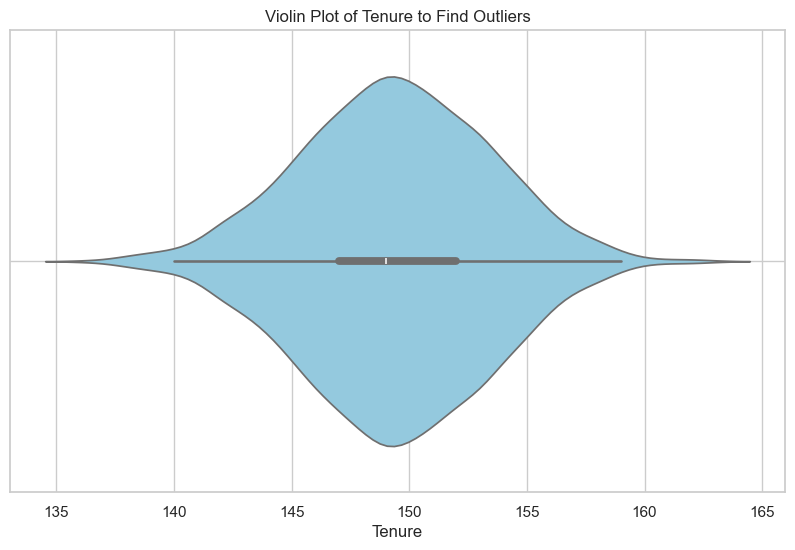

In [234]:
# Generate the data
total_samples = 5000
mu, sigma = 150, 4
x = np.random.normal(mu, sigma, total_samples).astype(int)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=x, color='skyblue')
plt.xlabel('Tenure')
plt.title('Violin Plot of Tenure to Find Outliers')
plt.grid(True)
plt.show()

Check for outliers

In [236]:
# Determine the number of rows containing outliers
# Compute the 25th percentile value in `tenure`
percentile25 = df0['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df0['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df0[(df0['tenure'] > upper_limit) | (df0['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [238]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df0.groupby(['quit'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\todd-\AppData\Local\Temp\ipykernel_38340\1798634705.py:2: FutureWarning: The provided callable <function mean at 0x000001B6EEC068E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df0.groupby(['quit'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\todd-\AppData\Local\Temp\ipykernel_38340\1798634705.py:2: FutureWarning: The provided callable <function median at 0x000001B6EEDF5620> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df0.groupby(['quit'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
quit,,
0,0.667365,0.69
1,0.440271,0.41


Step 2. Data Exploration (Continue EDA)

In [240]:
# Copy the dataframe
df_enc = df0.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


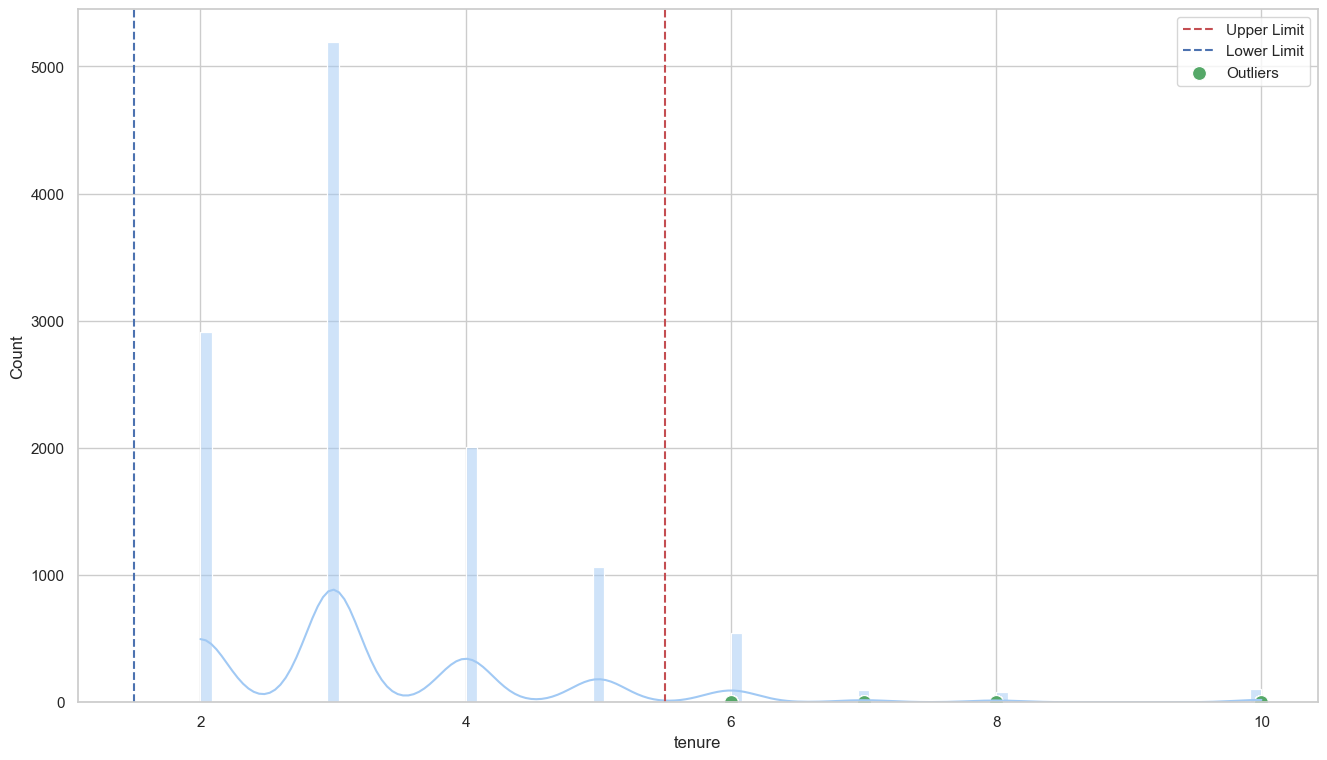

In [242]:
# Identify outliers
outliers = df0[(df0['tenure'] > upper_limit) | (df0['tenure'] < lower_limit)]

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the distribution of `tenure`
sns.histplot(df0['tenure'], kde=True, ax=ax)

# Add lines for the upper and lower limits
ax.axvline(upper_limit, color='r', linestyle='--', label='Upper Limit')
ax.axvline(lower_limit, color='b', linestyle='--', label='Lower Limit')

# Highlight the outliers
sns.scatterplot(data=outliers, x='tenure', y=[0]*len(outliers), color='g', s=100, label='Outliers', ax=ax)

# Add legend
ax.legend()

# Display the plot
plt.show()

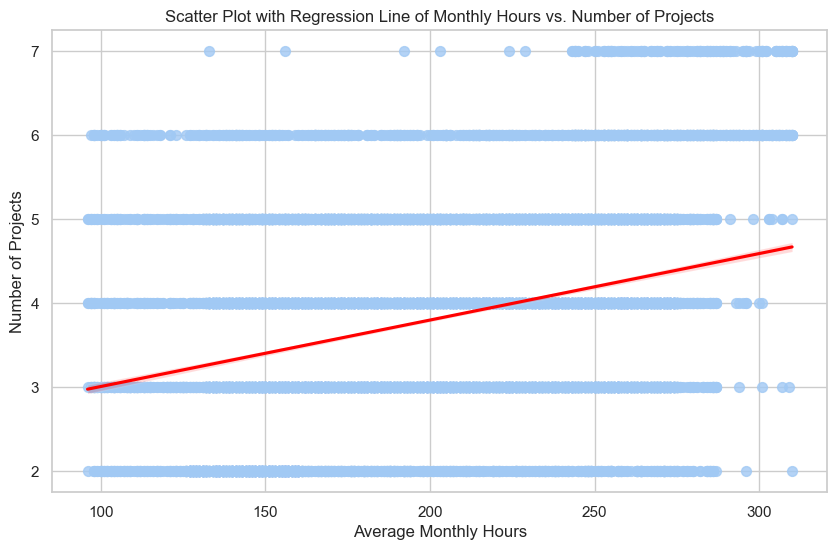

In [244]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df0, x='avg_monthly_hrs', y='projects', marker='o', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Average Monthly Hours')
plt.ylabel('Number of Projects')
plt.title('Scatter Plot with Regression Line of Monthly Hours vs. Number of Projects')
plt.show()

In [246]:
# get the number of people who has left salifort motors
count_left = sum(df0['quit']== False)
#print(df0['quit']).value_couunts()
print("count of employees who has stayed:", count_left )
# get the count of the employees that did not leave or where left <> false
count_stayed = sum(df0['quit'] != False)
print("count of eployess who quit:", count_stayed)

count of employees who has stayed: 10000
count of eployess who quit: 1991


In [248]:
# Get numbers of people who left vs. stayed
df0['quit'].value_counts()

# Get percentages of people who left vs. stayed
df0['quit'].value_counts() / df0['quit'].shape[0]

quit
0    0.833959
1    0.166041
Name: count, dtype: float64

# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

In [250]:
#quit_with_6_projects = df0[(df0['projects'] == 6) & (df0['quit'] == 1)].shape[0]

df0["projects"].value_counts()

projects
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

In [252]:
# Get numbers and percentages of people who left vs. stayed
left_counts = df0['quit'].value_counts()
left_percentages = df0['quit'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who quit vs. stayed:")
print(left_counts)
print("Percentage of employees who quit vs. stayed:")
print(left_percentages)

Number of employees who quit vs. stayed:
quit
0    10000
1     1991
Name: count, dtype: int64
Percentage of employees who quit vs. stayed:
quit
0    83.39588
1    16.60412
Name: proportion, dtype: float64


Count of employees who have quit: 1991
Count of employees who stayed: 10000


C:\Users\todd-\AppData\Local\Temp\ipykernel_38340\1010649621.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='Status', y='Count', palette='RdBu')


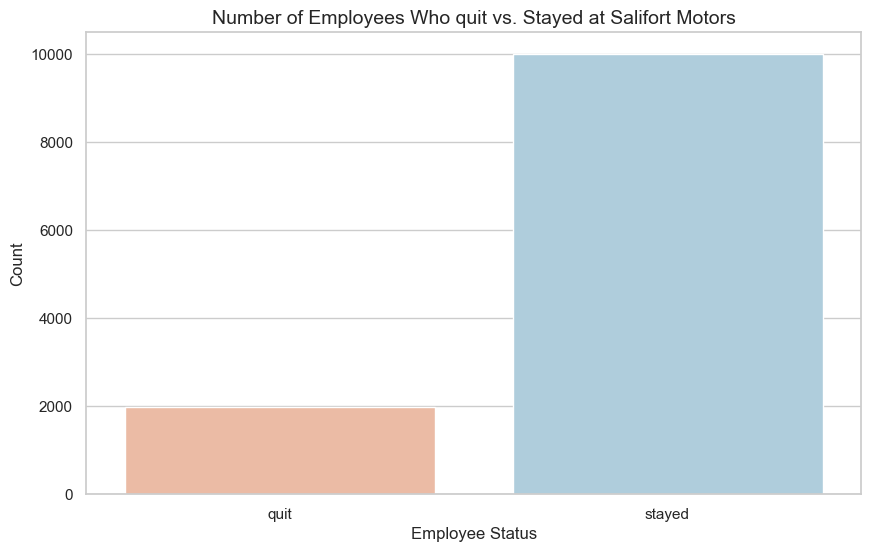

In [254]:
count_left = sum(df0['quit'] == True)
print("Count of employees who have quit:", count_left)

# Get the count of employees who have stayed
count_stayed = sum(df0['quit'] == False)
print("Count of employees who stayed:", count_stayed)

# Create a DataFrame for visualization
counts = pd.DataFrame({
    'Status': ['quit', 'stayed'],
    'Count': [count_left, count_stayed]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='Status', y='Count', palette='RdBu')

# Add title and labels
plt.title('Number of Employees Who quit vs. Stayed at Salifort Motors', fontsize=14)
plt.xlabel('Employee Status')
plt.ylabel('Count')

# Display the plot
plt.show()

Next, you could examine the average monthly hours versus the satisfaction levels.

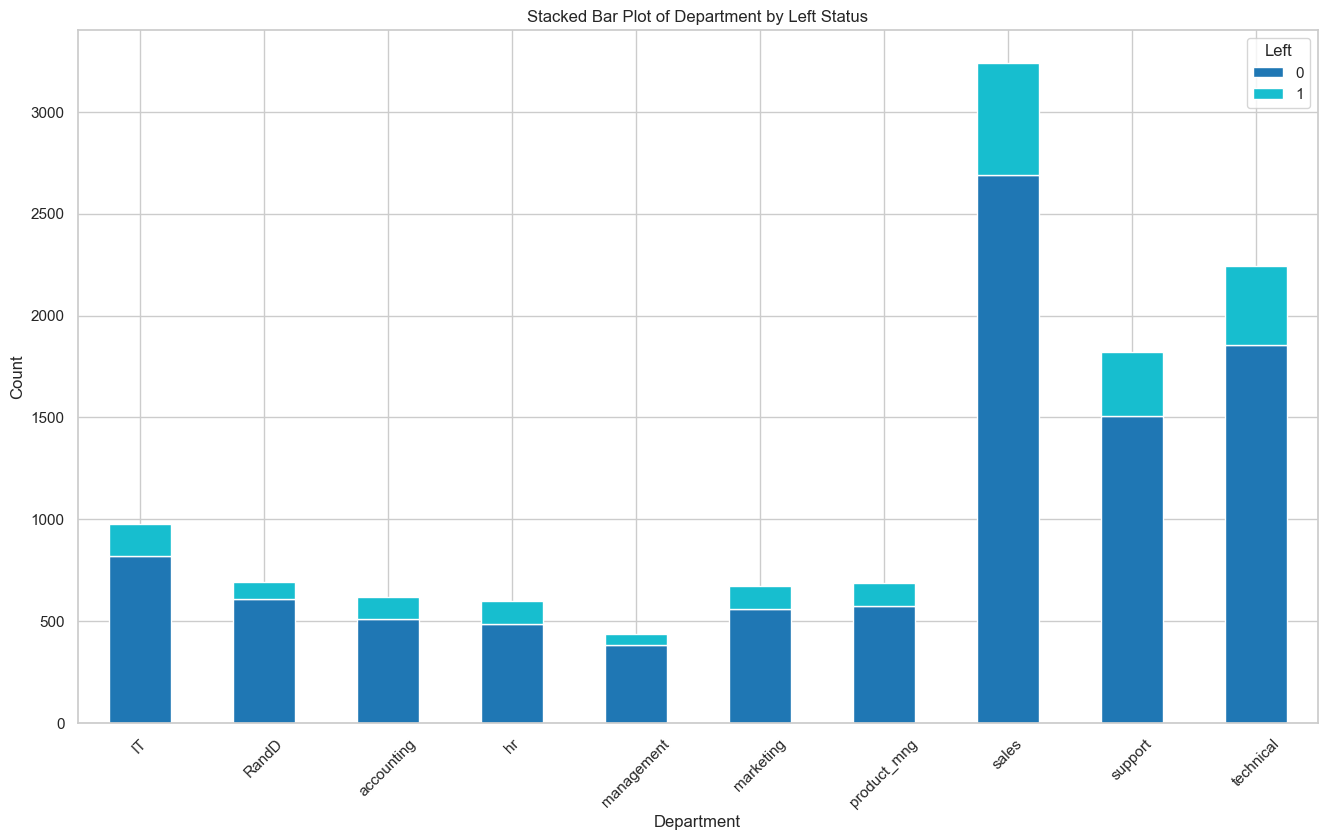

In [256]:
# Create a crosstab for the stacked bar plot
crosstab = pd.crosstab(df0['department'], df0['quit'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(16, 9), colormap='tab10')
plt.title('Stacked Bar Plot of Department by Left Status')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Left')
plt.show()

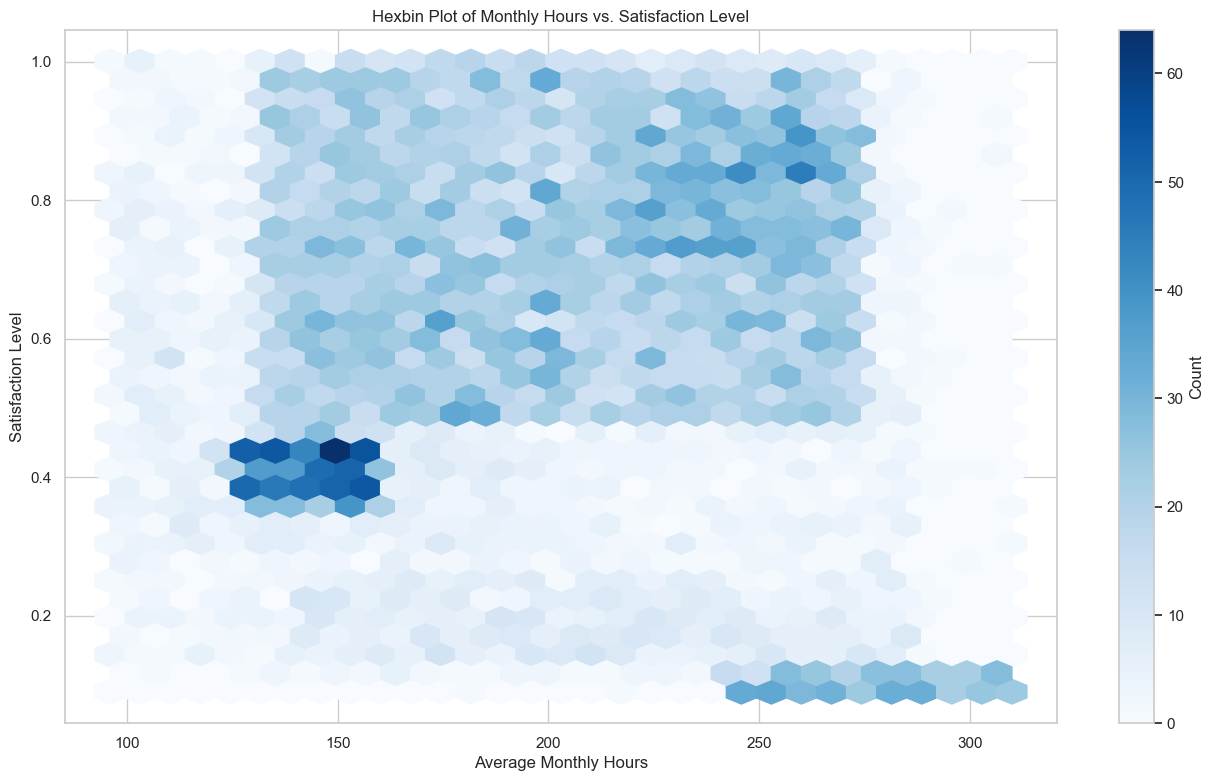

In [258]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create a hexbin plot
plt.figure(figsize=(16, 9))
plt.hexbin(df0['avg_monthly_hrs'], df0['satisfaction_level'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.title('Hexbin Plot of Monthly Hours vs. Satisfaction Level')
plt.show()

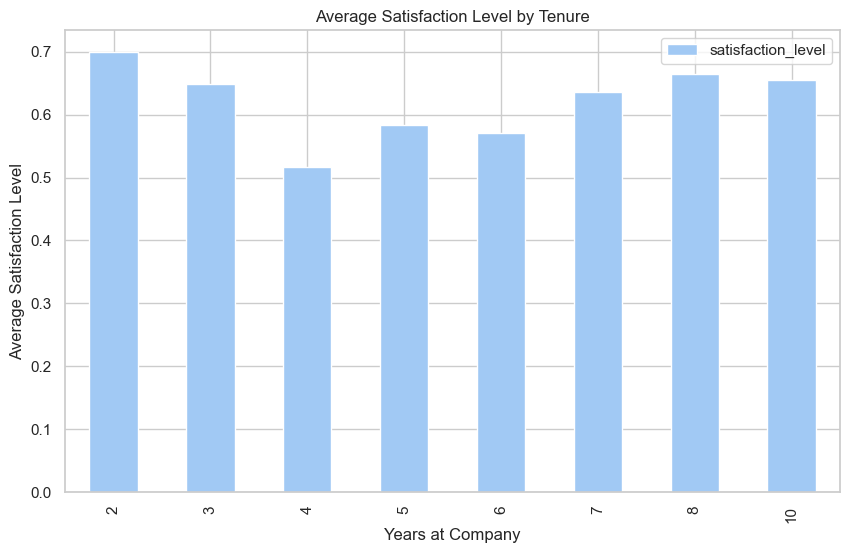

In [260]:
# Create pivot table showing satisfaction level by tenure for employee total
pivot_table = df0.pivot_table(values='satisfaction_level', index='tenure', aggfunc='mean')

# Create bar plot
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Satisfaction Level by Tenure')
plt.xlabel('Years at Company')
plt.ylabel('Average Satisfaction Level')
plt.show()

In [262]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df0.groupby(['quit'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\todd-\AppData\Local\Temp\ipykernel_38340\1798634705.py:2: FutureWarning: The provided callable <function mean at 0x000001B6EEC068E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df0.groupby(['quit'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\todd-\AppData\Local\Temp\ipykernel_38340\1798634705.py:2: FutureWarning: The provided callable <function median at 0x000001B6EEDF5620> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df0.groupby(['quit'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
quit,,
0,0.667365,0.69
1,0.440271,0.41


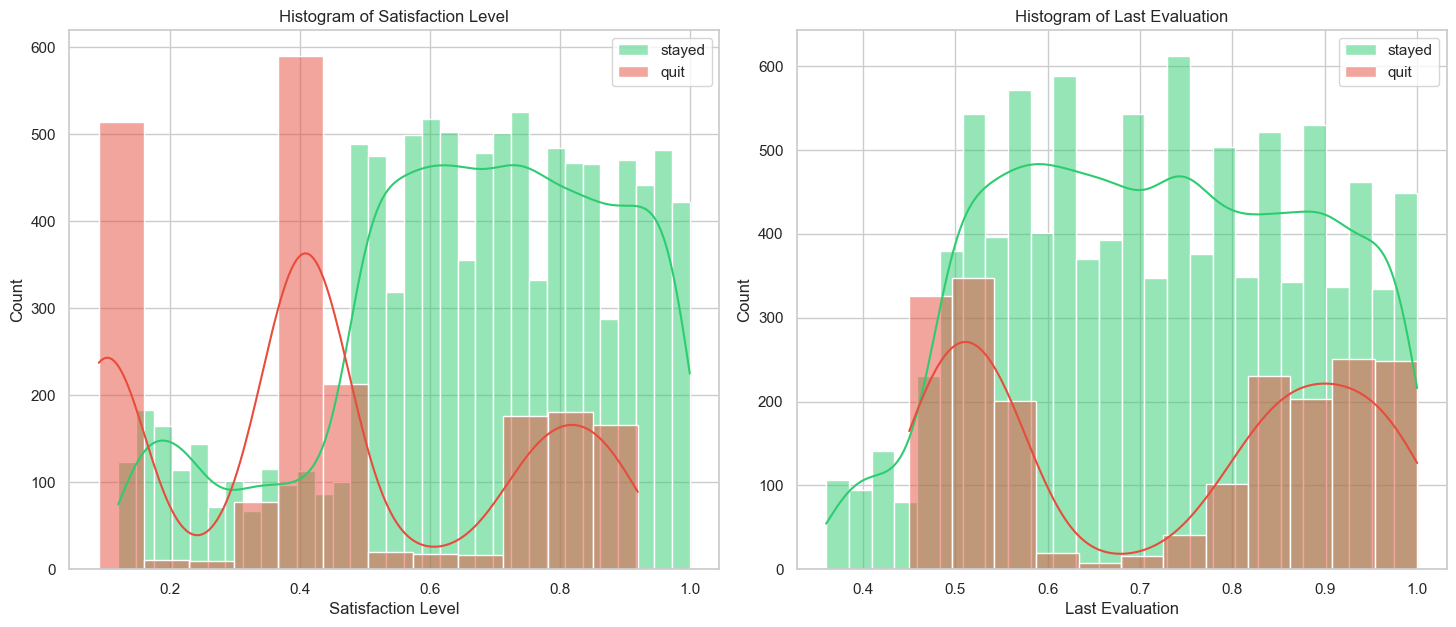

In [264]:
plt.figure(figsize=(22, 12))

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(df0[df0['quit'] == 0]['satisfaction_level'], kde=True, color='#2ecc71', label='stayed')
sns.histplot(df0[df0['quit'] == 1]['satisfaction_level'], kde=True, color='#e74c3c', label='quit')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

# Plot histogram for last_evaluation
plt.subplot(2, 3, 2)
sns.histplot(df0[df0['quit'] == 0]['last_evaluation'], kde=True, color='#2ecc71', label='stayed')
sns.histplot(df0[df0['quit'] == 1]['last_evaluation'], kde=True, color='#e74c3c', label='quit')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

plt.tight_layout()
plt.show()

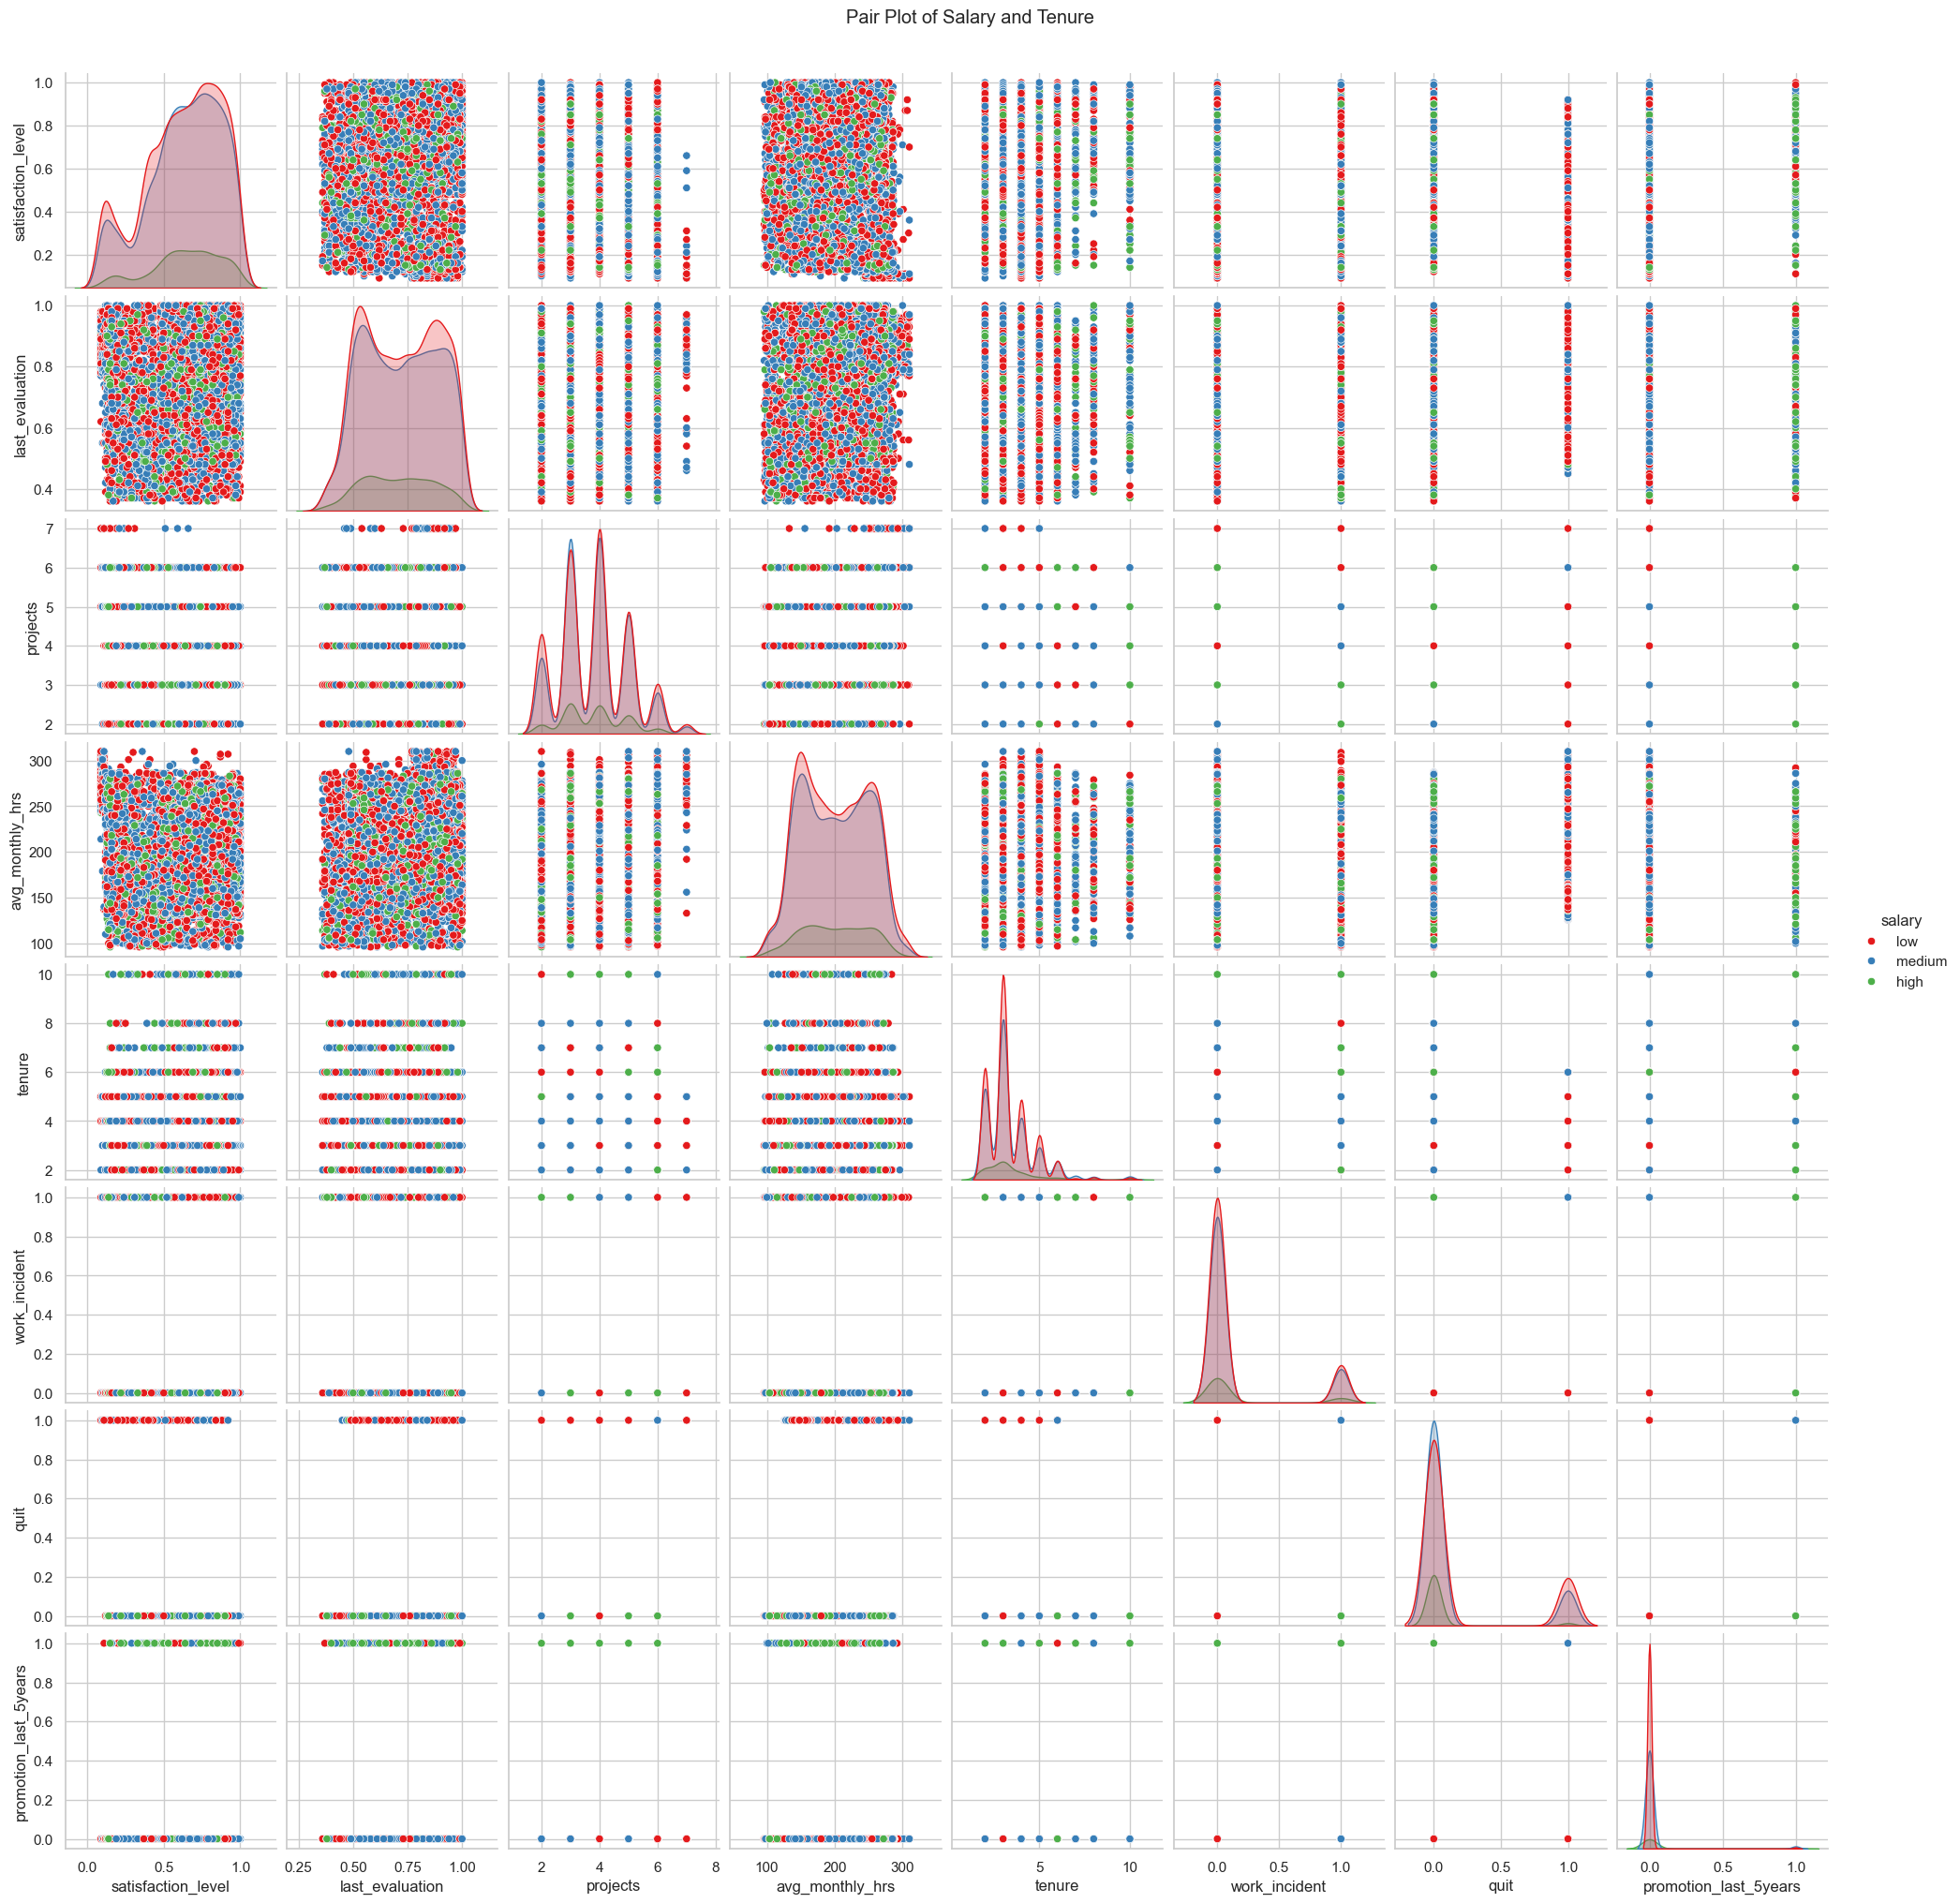

In [266]:
sns.pairplot(df0, hue='salary', palette='Set1')
plt.suptitle('Pair Plot of Salary and Tenure', y=1.02)
plt.show()

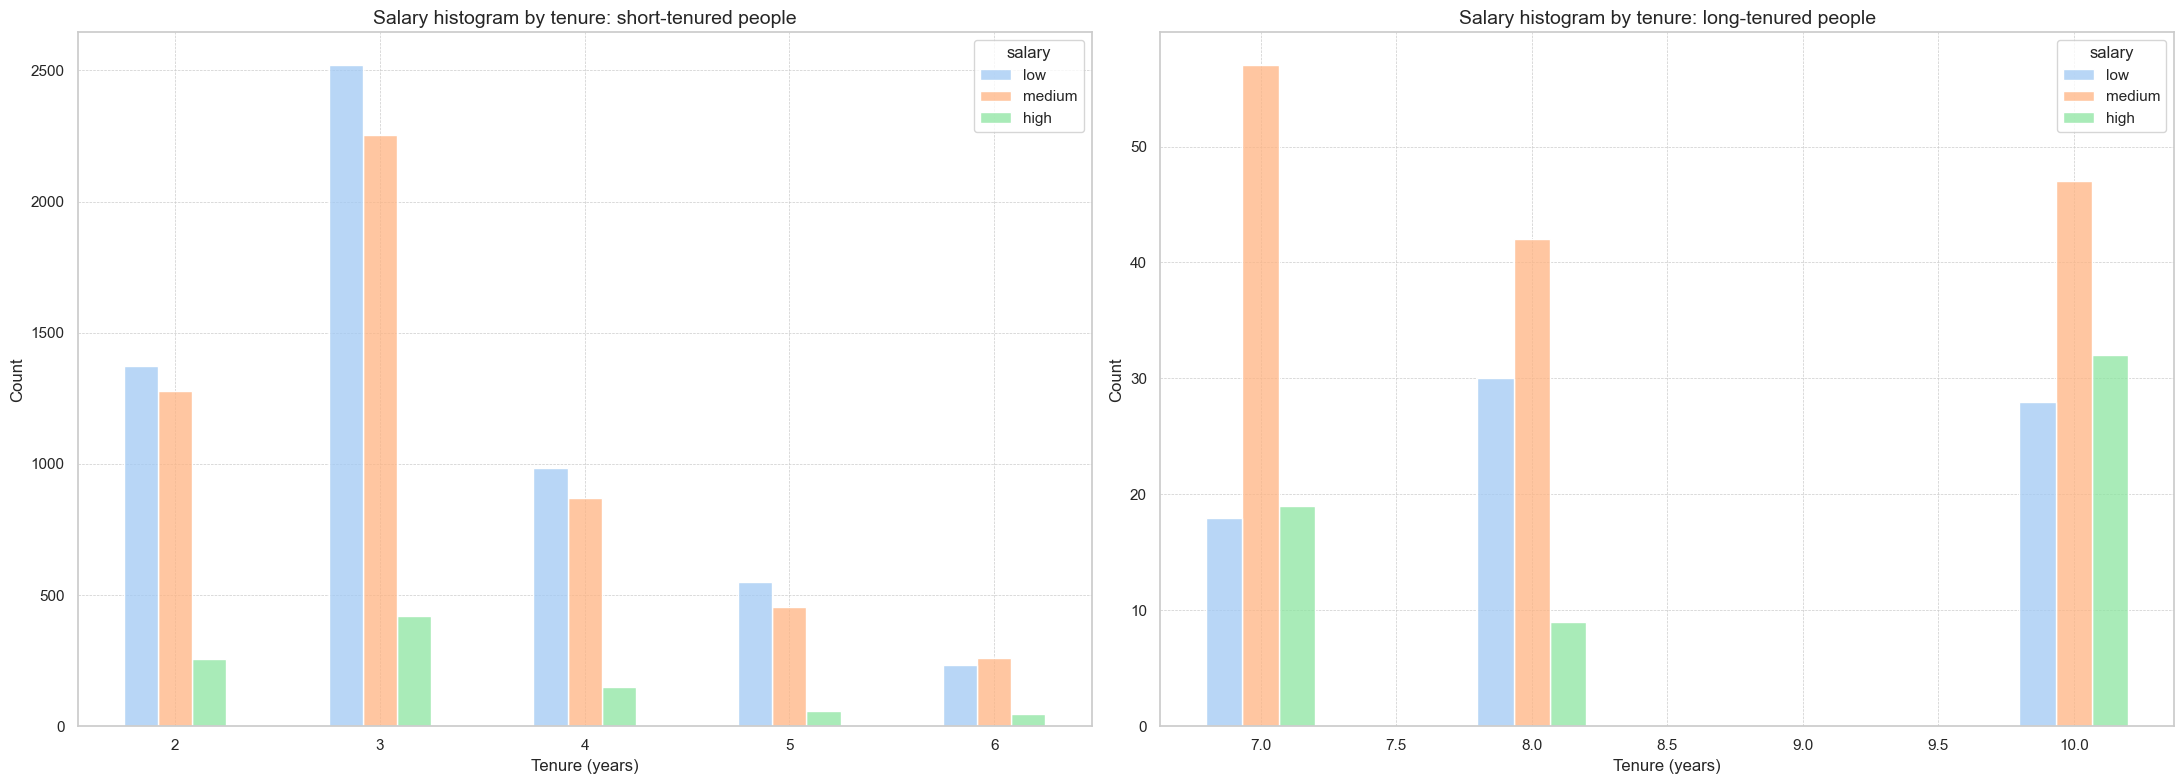

In [268]:
# Set theme and palette
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured employees
tenure_short = df0[df0['tenure'] < 7]

# Define long-tenured employees
tenure_long = df0[df0['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=14)
ax[0].set_xlabel('Tenure (years)', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=True, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)
ax[1].set_xlabel('Tenure (years)', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

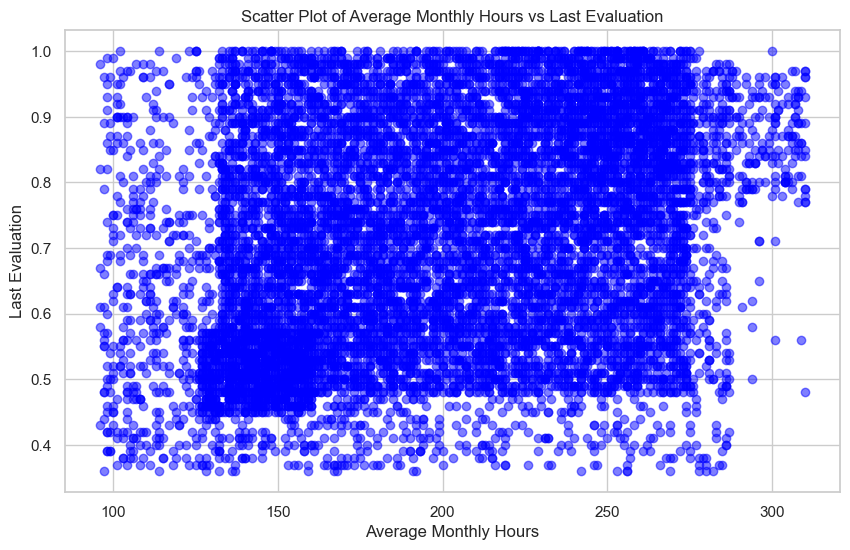

In [270]:
plt.figure(figsize=(10, 6))
plt.scatter(df0['avg_monthly_hrs'], df0['last_evaluation'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Average Monthly Hours vs Last Evaluation')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')
plt.show()

In [272]:
# Display counts for each department
df0["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [274]:
df0.groupby('department')['quit'].sum().sort_values(ascending = False)

department
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: quit, dtype: int64

In [276]:
df0.groupby('department')['quit'].mean().sort_values(ascending = False)

department
hr             0.188020
accounting     0.175523
technical      0.173797
support        0.171334
sales          0.169805
marketing      0.166419
IT             0.161885
product_mng    0.160350
RandD          0.122478
management     0.119266
Name: quit, dtype: float64

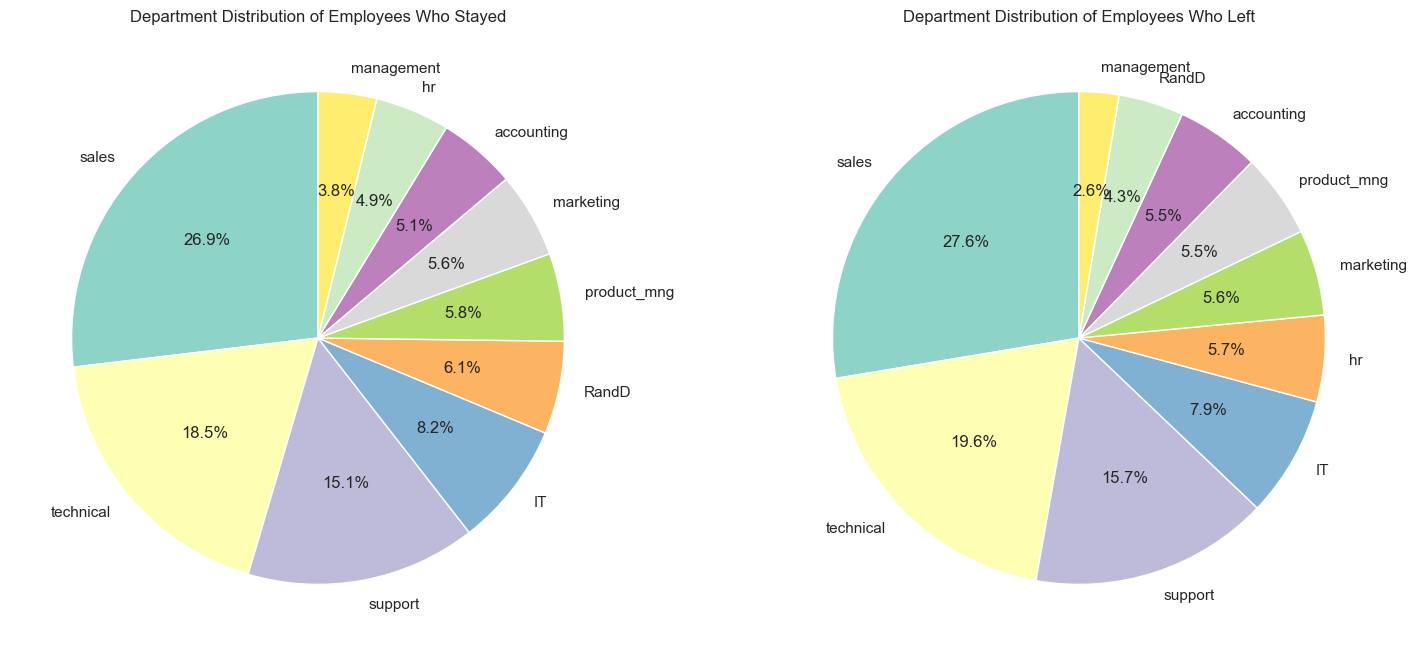

In [278]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for employees who stayed
df0[df0['quit'] == 0]['department'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, colormap='Set3')
axes[0].set_title('Department Distribution of Employees Who Stayed')
axes[0].set_ylabel('')

# Pie chart for employees who left
df0[df0['quit'] == 1]['department'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, colormap='Set3')
axes[1].set_title('Department Distribution of Employees Who Left')
axes[1].set_ylabel('')

plt.show()

C:\Users\todd-\AppData\Local\Temp\ipykernel_38340\2712504224.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)


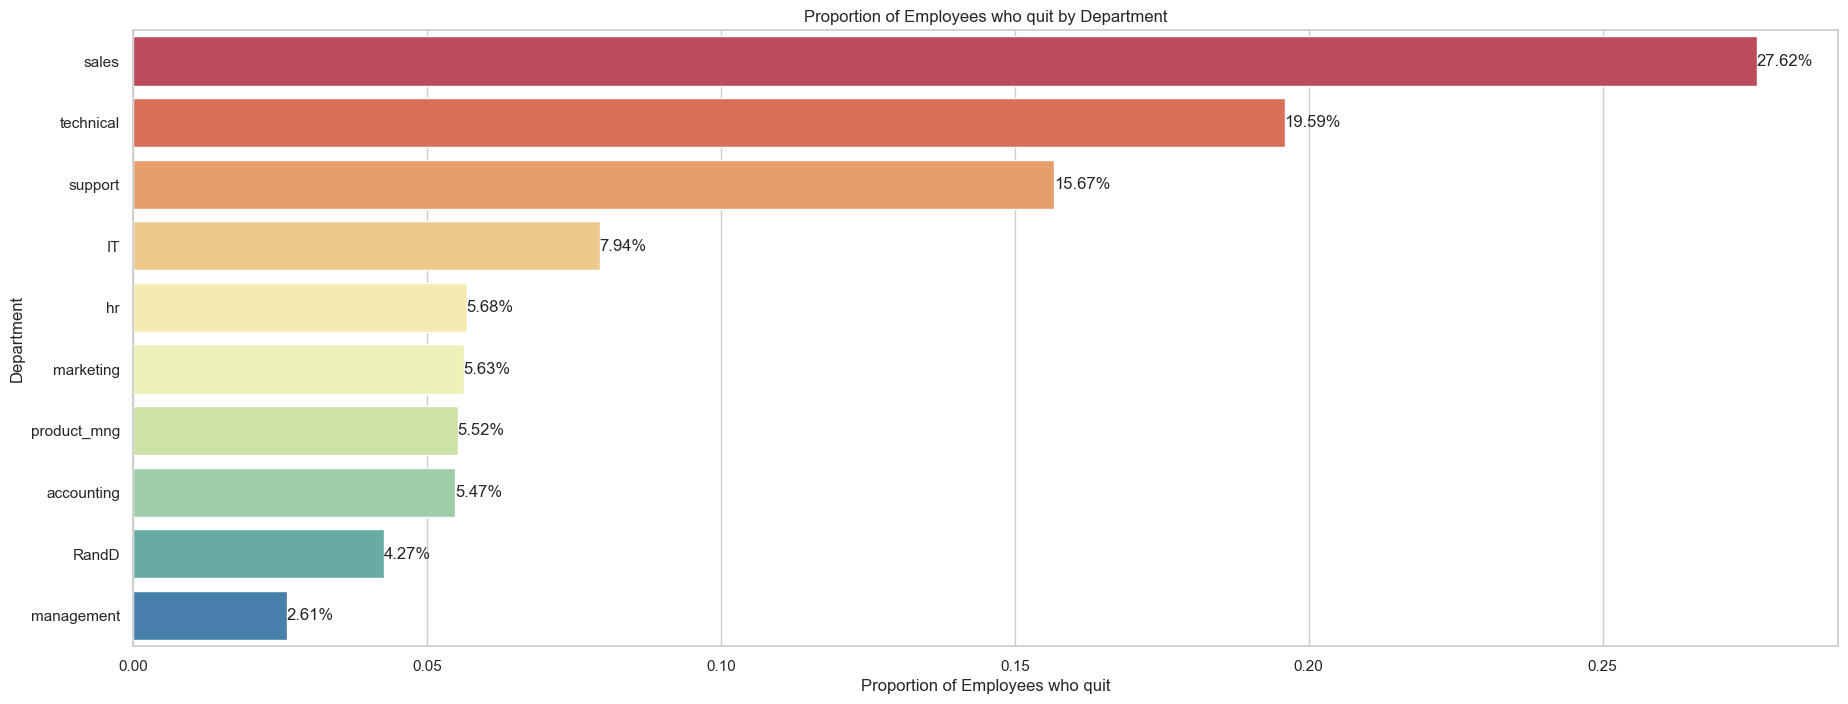

In [280]:
# Calculate the proportion of employees who left in each department
left_by_department = df0[df0['quit'] == 1]['department'].value_counts(normalize=True)

# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(22, 8))
colors = sns.color_palette('Spectral', len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)
plt.xlabel('Proportion of Employees who quit')
plt.ylabel('Department')
plt.title('Proportion of Employees who quit by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center')

plt.show()

In [ ]:
plt.figure(figsize = (12, 8))
#sns.heatmap(df0.corr(), vmin = 0, vmax = 1, annot=True, cmap=sns.color_palette("PuBuGn", as_cmap=True))
plt.title('Heat map of correlation between variables')

In [ ]:
# Group the data by tenure and calculate the turnover rate
turnover_rate = df0.groupby('tenure')['quit'].mean()

# Create the bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=turnover_rate.index, y=turnover_rate.values, palette='viridis')
plt.xlabel('Tenure')
plt.ylabel('Employee Retention Rate')
plt.title('Employee Retention Rate over Time')

# Annotate each bar with its turnover rate
for i, v in enumerate(turnover_rate.values):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', color='blue')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

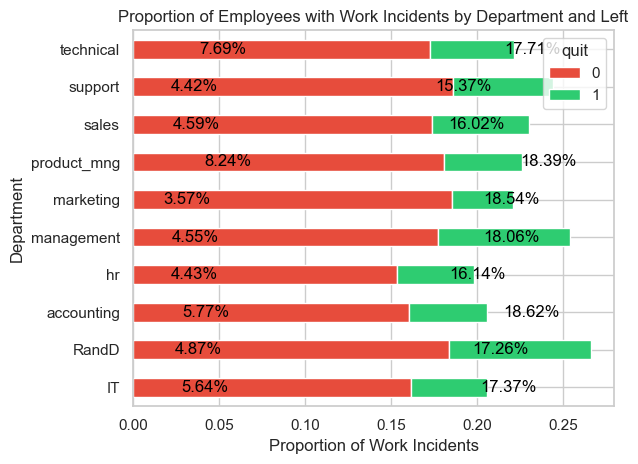

In [286]:
plt.figure(figsize=(12, 8))

# Group the data by department and left, and calculate the proportion of work accidents
work_accident_prop = df0.groupby(['department', 'quit'])['work_incident'].mean().unstack()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']

# Create the grouped horizontal bar plot
work_accident_prop.plot(kind='barh', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.ylabel('Department')
plt.xlabel('Proportion of Work Incidents')
plt.title('Proportion of Employees with Work Incidents by Department and Left')

# Add the proportion labels for each bar
for i, department in enumerate(department_order):
    left_prop = work_accident_prop.loc[department, 1]
    stayed_prop = work_accident_prop.loc[department, 0]
    plt.text(left_prop / 2, i, f'{left_prop:.2%}', va='center', color='black')
    plt.text(stayed_prop + left_prop / 2, i, f'{stayed_prop:.2%}', va='center', color='black')

plt.tight_layout()
plt.show()

In [288]:
df0.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [290]:
# Copy the dataframe
df_encode = df0.copy()

# Encode the `salary` column as an ordinal numeric category
df_encode['salary'] = (
    df_encode['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_encode = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_encode.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


<Figure size 1200x800 with 0 Axes>

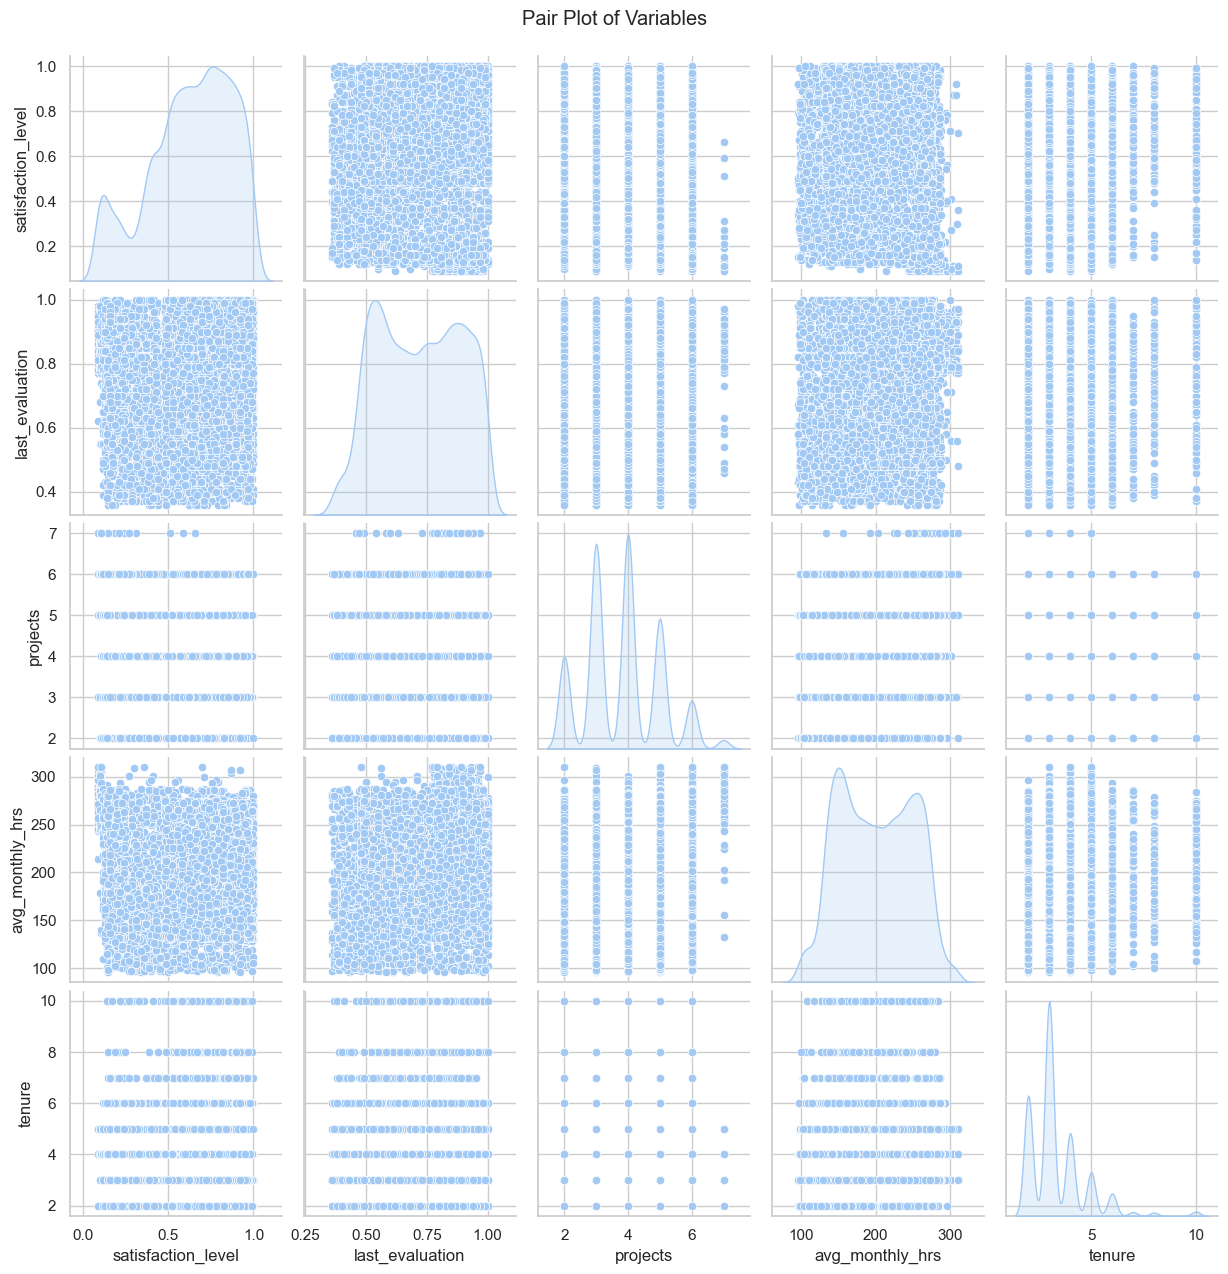

In [292]:
# Create a pair plot to visualize relationships between variables
plt.figure(figsize=(12, 8))
sns.pairplot(df_encode[['satisfaction_level', 'last_evaluation', 'projects', 'avg_monthly_hrs', 'tenure']], diag_kind='kde')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

In [294]:
# Removing outliers from 'tenure' and saving it in new variable
df_2 = df_encode[(df_encode['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_2.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hrs,tenure,work_incident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [296]:
# Isolate the outcome variable
y = df_2["quit"]

# Select the features you want to use in your model
X = df_2.drop('quit', axis=1)

In [298]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [300]:
# Construct a logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)

In [302]:
# Fitting log_reg to the training dataset
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [304]:
# Use the logistic regression model to get predictions on the test set
y_pre = log_reg.predict(X_test)

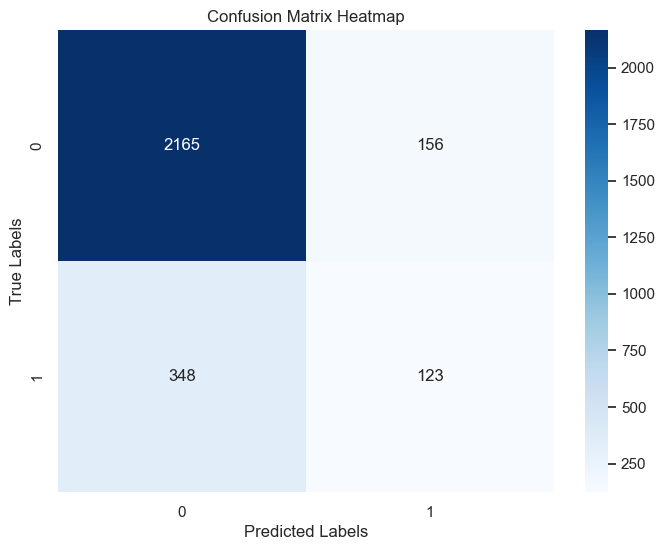

In [306]:
# Compute the confusion matrix
log_cm = confusion_matrix(y_test, y_pre, labels=log_reg.classes_)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [308]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pre, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [310]:
# Isolate the outcome variable
y = df_encode['quit']

# Select the features
X = df_encode.drop('quit', axis=1)

In [312]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [314]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Creating dictionary of hyperparameter to search over
cv_params = {'max_depth' : [4, 6, 8, None],
             'min_samples_leaf' : [2, 5, 1],
             'min_samples_split' : [2, 4, 6]
            }

# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_train, y_train)

In [ ]:
tree1.best_params_

In [ ]:
tree1.best_score_

In [322]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [ ]:
tree1_cv_results = make_results("decision tree cv", tree1, "auc")
tree1_cv_results

In [ ]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns=['gini_importance'], index=x.columns)
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

In [328]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

In [332]:
# Defining a path to the folder where we want to save the model
path = "C:/Users/todd-/OneDrive/Desktop/todd/Databases"

In [334]:
# Functions to pickle the model and read in the model.
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [336]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [338]:
# Write pickle
write_pickle(path, rf1, "hr_rf1")

In [340]:
# Read pickle
rf1 = read_pickle(path, "hr_rf1")

In [ ]:
# Best AUC score on CV
rf1.best_score_

In [ ]:
# Best parameters
rf1.best_params_

In [ ]:
# All CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

In [348]:
# Function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table